# Data Pre-processing

In [82]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series,DataFrame

In [11]:
# 데이터 불러오기
wine_a = pd.read_csv('IDA_A1_data/Wine_a.csv')
wine_b = pd.read_csv('IDA_A1_data/Wine_b.csv')

# 각 csv 파일을 ID로 합치기
wine_merge = pd.merge(wine_a,wine_b,on='ID',how='outer')

# ID column 버리기
wine_drop_ID = wine_merge.drop('ID',axis=1)
# wine_drop_ID
# 200 rows × 14 columns

In [12]:
# 전체 칼럼 value가 동일할 경우 Duplicate으로 보고 삭제
wine_drop_duplicate = wine_drop_ID.drop_duplicates()
# 37 행 삭제 
# 이거 처리 안해주고 while 돌리면 에러발생
wine_drop_duplicate[30:40]
# 199 rows × 14 columns

,Type,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
30,A,13.77,1.90,2.68,17.1,115.0,3.00,2.79,0.39,1.68,6.30,1.13,2.93,1375.0
31,A,13.48,1.81,2.41,NaN,100.0,2.70,2.98,0.26,1.86,5.10,1.04,3.47,920.0
32,A,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0
33,A,NaN,NaN,NaN,22.2,91.0,NaN,NaN,1.34,NaN,NaN,1.51,NaN,NaN
34,A,13.73,1.50,2.70,22.5,101.0,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285.0
35,A,12.25,1.22,3.36,15.9,149.0,1.23,2.63,1.30,1.03,4.58,9999.00,2.01,359.0
36,A,13.83,1.57,2.62,20.0,115.0,2.95,3.40,0.40,1.72,6.60,1.13,2.57,1130.0
38,A,14.19,1.59,2.48,16.5,108.0,3.30,3.93,0.32,1.86,8.70,1.23,2.82,1680.0
39,A,13.68,1.83,2.36,17.2,104.0,2.42,2.69,0.42,1.97,3.84,1.23,2.87,990.0
40,A,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0


In [16]:
# nan 들어있어도 평균 계산 시 제외되기 때문에 nan 이 두개 이상인 행 부터 삭제
# thresh 이용
wine_drop_many_nan = wine_drop_duplicate.dropna(thresh=13)
#wine_drop_many_nan
# 179 rows × 14 columns
# 인덱스 재조정 위해 파일 임시저장
# reindex 안되는 이유?
wine_drop_many_nan.to_csv('final_data/wine_use_thresh.csv',index=False, na_rep='NULL')

In [30]:
wine_2 = pd.read_csv('final_data/wine_use_thresh.csv')
wine_2
#179 rows × 14 columns

,Type,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,A,13.88,1.89,2.59,15.0,101.0,3.25,3.56,0.17,1.70,5.430000,0.88,3.56,1095.0
1,A,13.56,1.71,2.31,16.2,117.0,3.15,3.29,0.34,2.34,6.130000,0.95,3.38,795.0
2,A,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735.0
3,A,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.500000,1.20,3.00,1547.0
4,A,14.10,2.02,2.40,18.8,103.0,2.75,2.92,0.32,2.38,6.200000,NaN,2.75,1060.0
5,A,12.93,3.80,2.65,18.6,102.0,2.41,2.41,NaN,1.98,4.500000,1.03,3.52,770.0
6,A,14.21,4.04,2.44,18.9,111.0,2.85,2.65,0.30,1.25,5.240000,0.87,3.33,1080.0
7,A,13.05,1.77,2.10,17.0,107.0,3.00,3.00,0.28,2.03,5.040000,0.88,3.35,885.0
8,A,13.05,1.65,2.55,18.0,98.0,2.45,2.43,0.29,1.44,4.250000,1.12,2.51,1105.0
9,A,14.22,1.70,2.30,16.3,118.0,3.20,3.00,0.26,2.03,6.380000,0.94,3.31,970.0


In [31]:
wine_2.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
count,179.000000,179.000000,176.000000,178.000000,176.000000,179.000000,178.000000,177.000000,179.000000,176.000000,176.000000,178.000000,179.000000
mean,62.573240,2.341564,2.379716,19.501124,100.551136,2.292235,2.042247,0.377853,1.599553,5.125170,57.765318,2.616292,741.916201
std,663.349722,1.121437,0.305759,3.343414,15.298840,0.632011,0.995390,0.187213,0.598041,2.386922,753.630788,0.725520,312.429765
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.350000,1.595000,2.210000,17.200000,88.000000,1.730000,1.227500,0.270000,1.245000,3.250000,0.780000,1.937500,500.000000
50%,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.155000,0.340000,1.550000,4.690000,0.965000,2.780000,672.000000
75%,13.675000,3.110000,2.565000,21.500000,108.000000,2.800000,2.887500,0.450000,1.955000,6.262500,1.120000,3.177500,977.500000
max,8888.000000,5.800000,3.910000,30.000000,162.000000,3.880000,5.080000,1.980000,3.920000,13.000000,9999.000000,4.540000,1680.000000


In [29]:
i=0
nan_arr=[]
while (i<179):
    if (wine_2.loc[i].isna().sum())==1:
        nan_arr.append(i)
        print(i)
        print(wine_2.loc[i])
    i=i+1
print(nan_arr)

4
Type                       A
Alcohol                 14.1
Malic_Acid              2.02
Ash                      2.4
Ash_Alcalinity          18.8
Magnesium                103
Total_Phenols           2.75
Flavanoids              2.92
Nonflavanoid_Phenols    0.32
Proanthocyanins         2.38
Color_Intensity          6.2
Hue                      NaN
OD280_OD315             2.75
Proline                 1060
Name: 4, dtype: object
5
Type                        A
Alcohol                 12.93
Malic_Acid                3.8
Ash                      2.65
Ash_Alcalinity           18.6
Magnesium                 102
Total_Phenols            2.41
Flavanoids               2.41
Nonflavanoid_Phenols      NaN
Proanthocyanins          1.98
Color_Intensity           4.5
Hue                      1.03
OD280_OD315              3.52
Proline                   770
Name: 5, dtype: object
28
Type                        A
Alcohol                 13.48
Malic_Acid               1.81
Ash                      2.41
A

In [35]:
header = ['Hue','Ash_Alcalinity','Nonflavanoid_Phenols','Color_Intensity','OD280_OD315','Magnesium','Ash','Flavanoids']

for k in header:
    wine_2[k] = wine_2[k].fillna(wine_2[k].mean(axis=0))
# 어차피 지금 각 행마다 nan 하나씩 있고 이를 평균으로 처리할 거니까 
# column 의 평균을 axis=0 해서 nan 이면 평균값 넣기

In [36]:
wine_2
# nan 값 처리 된거 확인 가능

,Type,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,A,13.88,1.89,2.590000,15.000000,101.000000,3.25,3.560000,0.170000,1.70,5.430000,0.880000,3.56,1095.0
1,A,13.56,1.71,2.310000,16.200000,117.000000,3.15,3.290000,0.340000,2.34,6.130000,0.950000,3.38,795.0
2,A,13.24,2.59,2.870000,21.000000,118.000000,2.80,2.690000,0.390000,1.82,4.320000,1.040000,2.93,735.0
3,A,14.38,1.87,2.380000,12.000000,102.000000,3.30,3.640000,0.290000,2.96,7.500000,1.200000,3.00,1547.0
4,A,14.10,2.02,2.400000,18.800000,103.000000,2.75,2.920000,0.320000,2.38,6.200000,57.765318,2.75,1060.0
5,A,12.93,3.80,2.650000,18.600000,102.000000,2.41,2.410000,0.377853,1.98,4.500000,1.030000,3.52,770.0
6,A,14.21,4.04,2.440000,18.900000,111.000000,2.85,2.650000,0.300000,1.25,5.240000,0.870000,3.33,1080.0
7,A,13.05,1.77,2.100000,17.000000,107.000000,3.00,3.000000,0.280000,2.03,5.040000,0.880000,3.35,885.0
8,A,13.05,1.65,2.550000,18.000000,98.000000,2.45,2.430000,0.290000,1.44,4.250000,1.120000,2.51,1105.0
9,A,14.22,1.70,2.300000,16.300000,118.000000,3.20,3.000000,0.260000,2.03,6.380000,0.940000,3.31,970.0


In [62]:
# 다시 임시저장
wine_2.to_csv('final_data/wine_no_nan.csv',index=False)

In [63]:
wine_3 = pd.read_csv('final_data/wine_no_nan.csv')
wine_3.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,62.573240,2.341564,2.379716,19.501124,100.551136,2.292235,2.042247,0.377853,1.599553,5.125170,57.765318,2.616292,741.916201
std,663.349722,1.121437,0.303171,3.334009,15.169370,0.632011,0.992590,0.186158,0.598041,2.366722,747.252980,0.723479,312.429765
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.350000,1.595000,2.215000,17.200000,88.000000,1.730000,1.235000,0.270000,1.245000,3.260000,0.785000,1.945000,500.000000
50%,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.140000,0.340000,1.550000,4.800000,0.980000,2.780000,672.000000
75%,13.675000,3.110000,2.560000,21.500000,108.000000,2.800000,2.885000,0.450000,1.955000,6.225000,1.120000,3.175000,977.500000
max,8888.000000,5.800000,3.910000,30.000000,162.000000,3.880000,5.080000,1.980000,3.920000,13.000000,9999.000000,4.540000,1680.000000


proline 의 평균이 제일 크다.

In [64]:
np.std(wine_drop_type.Proline)*5

1557.779169767691

In [65]:
# Type 을 삭제해야 제대로 outlie 할 수 있음 
wine_drop_type = wine_3.drop('Type',axis=1)
wine_outlie = wine_drop_type[((wine_drop_type)>np.std(wine_drop_type.Proline)*5)]
#wine_outlie 
# 삭제해야할 값만 숫자로 뜸
# ex 8888.0
# 179 rows × 13 columns

In [66]:
for_drop_index = 0
while (for_drop_index<179):
    if (wine_outlie.loc[for_drop_index].isna().sum())<13:
    # 값이 하나라도 있으면
        wine_3 = wine_3.drop(for_drop_index)
    for_drop_index = for_drop_index + 1

In [68]:
wine_3
#176 rows × 14 columns

,Type,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,A,13.88,1.89,2.590000,15.000000,101.000000,3.25,3.560000,0.170000,1.70,5.430000,0.880000,3.56,1095.0
1,A,13.56,1.71,2.310000,16.200000,117.000000,3.15,3.290000,0.340000,2.34,6.130000,0.950000,3.38,795.0
2,A,13.24,2.59,2.870000,21.000000,118.000000,2.80,2.690000,0.390000,1.82,4.320000,1.040000,2.93,735.0
3,A,14.38,1.87,2.380000,12.000000,102.000000,3.30,3.640000,0.290000,2.96,7.500000,1.200000,3.00,1547.0
4,A,14.10,2.02,2.400000,18.800000,103.000000,2.75,2.920000,0.320000,2.38,6.200000,57.765318,2.75,1060.0
5,A,12.93,3.80,2.650000,18.600000,102.000000,2.41,2.410000,0.377853,1.98,4.500000,1.030000,3.52,770.0
6,A,14.21,4.04,2.440000,18.900000,111.000000,2.85,2.650000,0.300000,1.25,5.240000,0.870000,3.33,1080.0
7,A,13.05,1.77,2.100000,17.000000,107.000000,3.00,3.000000,0.280000,2.03,5.040000,0.880000,3.35,885.0
8,A,13.05,1.65,2.550000,18.000000,98.000000,2.45,2.430000,0.290000,1.44,4.250000,1.120000,2.51,1105.0
9,A,14.22,1.70,2.300000,16.300000,118.000000,3.20,3.000000,0.260000,2.03,6.380000,0.940000,3.31,970.0


In [80]:
# 최종저장
wine_3.to_csv('final_data/df_ﬁnal.csv',index=False)

In [86]:
df_final = pd.read_csv('final_data/df_ﬁnal.csv', engine='python')
#df_final

## visualize

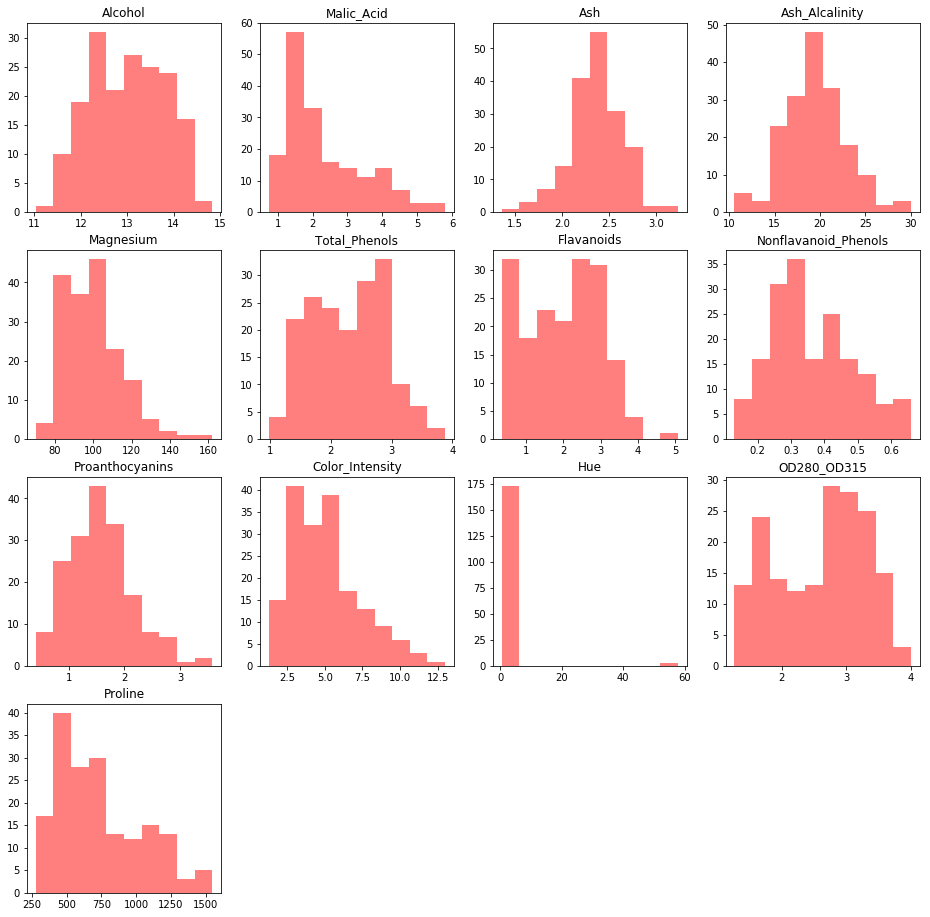

In [90]:
column_data=['Alcohol','Malic_Acid','Ash','Ash_Alcalinity','Magnesium','Total_Phenols',
              'Flavanoids','Nonflavanoid_Phenols','Proanthocyanins','Color_Intensity','Hue',
              'OD280_OD315','Proline']

fig_1 = plt.figure(figsize=[16,16])
v_1 = 1
for header in column_data:
    will_plot = df_final[header]
    fig_1_ax = fig_1.add_subplot(4,4,v_1)
    fig_1_ax.hist(will_plot,label=header,color='r',alpha=0.5)
    fig_1_ax.set_title(header)
    v_1 = v_1 + 1

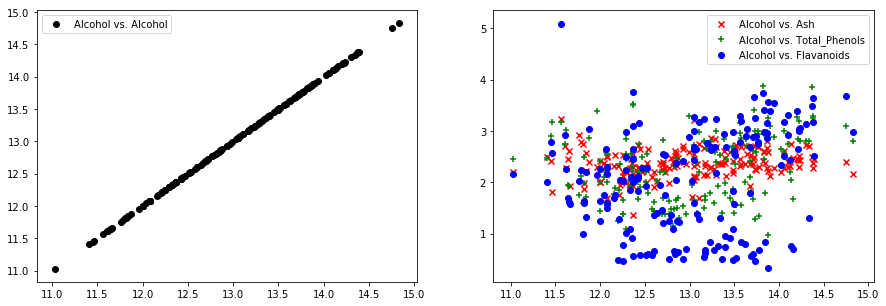

In [91]:
fig_2, ax_2 = plt.subplots(1,2,sharex='col',figsize=[15,5])
data_x = df_final.Alcohol
data_y = df_final.Alcohol
ax_2[0].scatter(data_x,data_y,color='k',label="Alcohol vs. Alcohol")
ax_2[0].legend(loc='best')
ax_2[1].scatter(data_x,df_final.Ash,color='r',marker='x',label="Alcohol vs. Ash")
ax_2[1].scatter(data_x,df_final.Total_Phenols,color='g',marker='+',label="Alcohol vs. Total_Phenols")
ax_2[1].scatter(data_x,df_final.Flavanoids,color='b',marker='o',label="Alcohol vs. Flavanoids")
ax_2[1].legend(loc='best')